In [1]:
import pandas as pd
import numpy as np

data_handle = 'cond1_pat1to81'

inter_dir = '../../data/intermediates'
fname_in = 'feature_gen_post_' + data_handle + '.csv'

X = pd.read_csv(inter_dir + '/' + fname_in, index_col='subject')
X = X.values

print(X)

[[ 1.00000000e+00  1.00000000e+00 -4.89054600e+04 ...  2.81355629e+00
   4.60985308e+00  3.76602000e+01]
 [ 1.00000000e+00  1.00000000e+00  3.42777040e+03 ...  2.12048045e+00
   2.80013214e+00  4.16759857e+01]
 [ 1.00000000e+00  1.00000000e+00  8.30409250e+03 ...  1.81371528e+00
   2.33540720e+00  4.95990429e+01]
 ...
 [ 1.00000000e+00  1.00000000e+00 -2.35803294e+04 ...  3.17787901e+00
   4.19894808e+00  2.37877286e+01]
 [ 1.00000000e+00  1.00000000e+00  7.49237370e+03 ...  2.27740411e+00
   2.87395432e+00  1.10528143e+01]
 [ 1.00000000e+00  1.00000000e+00 -6.51696800e+02 ...  3.18281285e+00
   4.06001535e+00  5.11188429e+01]]


In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

class fullPCA():
    def __init__(self, X):
        self.X = X
    
    def scale_X(self):
        sc = StandardScaler()
        self.X = sc.fit_transform(self.X)
    
    def exec_PCA(self):
        pca = PCA()
        self.X = pca.fit_transform(self.X)
    
    def plot_PC(self):
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1])

In [6]:
fpca = fullPCA(X)
fpca.scale_X()
fpca.exec_PCA()
X = fpca.X

print(X)

[[ 5.51683002e-01 -6.48877843e-01  1.95498360e+00 ...  4.69210071e-02
  -1.80418616e+00  1.00771458e-17]
 [-1.31566926e+00 -1.59676668e-01  2.70882924e-01 ... -1.44718107e+00
   1.88786021e-01  1.00771458e-17]
 [ 2.75067651e-02 -1.16034442e+00  1.28608562e+00 ... -1.72432242e+00
   4.64215813e-01  1.00771458e-17]
 ...
 [-4.52001926e-01  1.92623780e-01 -7.74441479e-01 ... -3.08194911e-01
   1.31643982e+00  1.00771458e-17]
 [-3.55855162e-01  8.33695733e-01 -1.40153136e+00 ...  8.66625566e-02
  -1.73271225e+00  1.00771458e-17]
 [-3.80352935e-01 -3.88832081e-01 -1.94580688e+00 ... -1.45558676e+00
   5.20967829e-01  1.00771458e-17]]


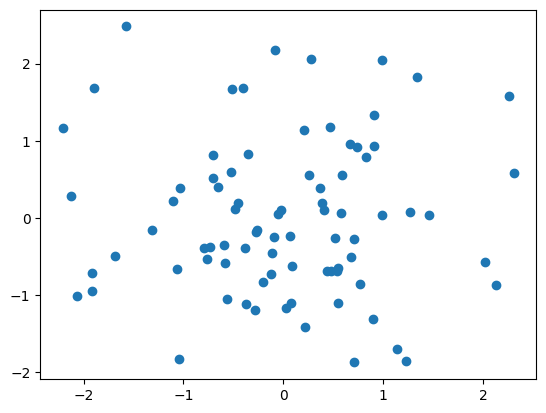

In [7]:
fpca.plot_PC()

In [8]:
# calculate the projection matrix of the design matrix (X)
H = X@np.linalg.pinv(X.T@X)@X.T

In [9]:
def find_high_leverage_points(X, H, lev_frac):
    for ii in range(len(H)):
        leverage = H[ii, ii]
        if leverage > lev_frac*X.shape[1]/X.shape[0]:
            print(f"subject {ii+1} has high leverage!")

In [10]:
find_high_leverage_points(X, H, 2)

In [ ]:
# F- I-- N---